# CIFAR—Decision Tree
It is using a binary tree graph to assign for each image or data sample a target value. 

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__
warnings.filterwarnings("ignore")

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Load data

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# load data
def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    """
    Parameters:
    cifar10_dataset_folder_path: path of data
    batch_id: batch number
    """
    print(cifar10_dataset_folder_path)
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')
    
    # features and labels
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']

    return features, labels

In [4]:
# Load all data
cifar10_path = '/content/drive/MyDrive/281project/cifar-10-batches-py'

# We have 5 batches

x_train, y_train = load_cfar10_batch(cifar10_path, 1)
for i in range(2, 6):
    features, labels = load_cfar10_batch(cifar10_path, i)
    x_train, y_train = np.concatenate([x_train, features]), np.concatenate([y_train, labels])

/content/drive/MyDrive/281project/cifar-10-batches-py
/content/drive/MyDrive/281project/cifar-10-batches-py
/content/drive/MyDrive/281project/cifar-10-batches-py
/content/drive/MyDrive/281project/cifar-10-batches-py
/content/drive/MyDrive/281project/cifar-10-batches-py


In [5]:
# Load test data
with open(cifar10_path + '/test_batch', mode='rb') as file:
    batch = pickle.load(file, encoding='latin1')
    x_test = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    y_test = batch['labels']

# Sample pictures

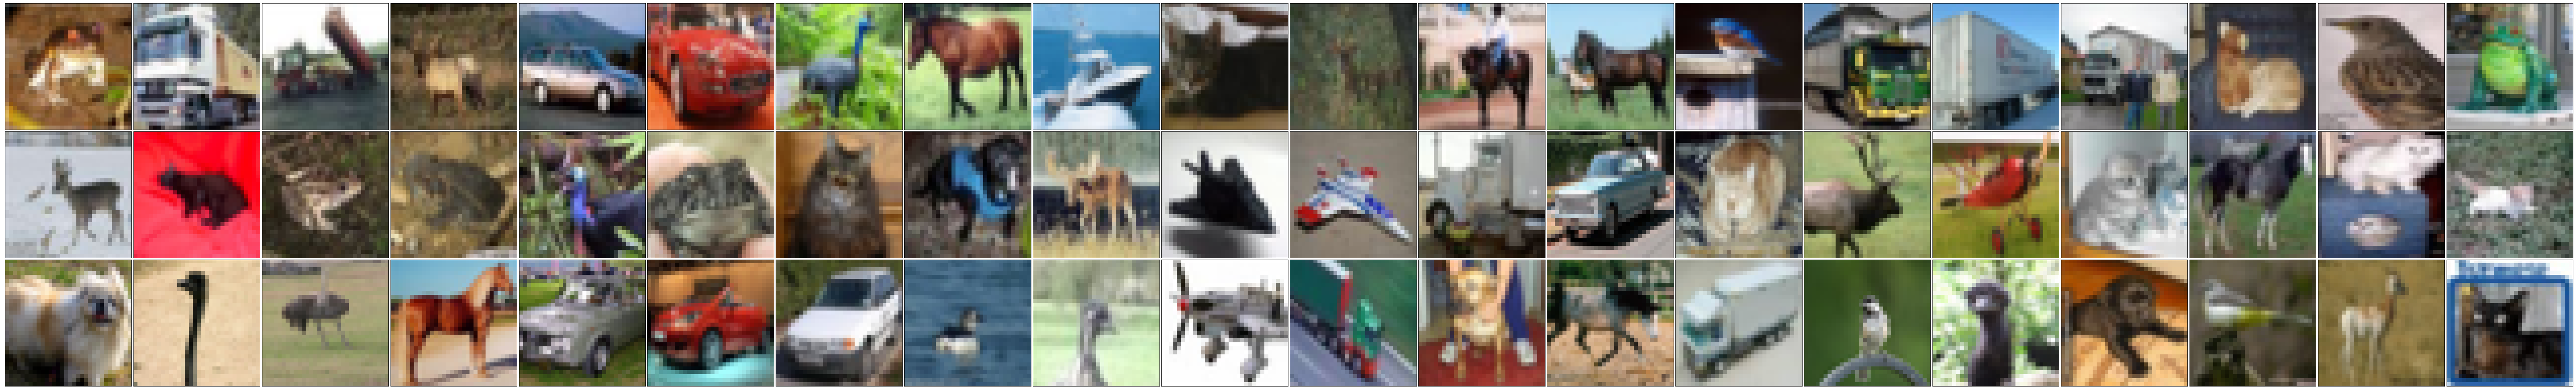

In [6]:
# Show pictures
fig, axes = plt.subplots(nrows=3, ncols=20, sharex=True, sharey=True, figsize=(80,12))
imgs = x_train[:60]

for image, row in zip([imgs[:20], imgs[20:40], imgs[40:60]], axes):
    for img, ax in zip(image, row):
        ax.imshow(img)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)


# Data pre-processing

In [7]:
# Reshape data
x_train_rows = x_train.reshape(x_train.shape[0], 32 * 32 * 3)
x_test_rows = x_test.reshape(x_test.shape[0], 32 * 32 * 3)

# minmax 
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

x_train_rows = minmax.fit_transform(x_train_rows)
x_test_rows = minmax.fit_transform(x_test_rows)

# Construct network

Decision Tree

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train_rows, y_train)
y_pred_dtc=dtc.predict(x_test_rows)
accuracy_score(y_pred_dtc,y_test)
print(classification_report(y_pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.35      0.34      0.35      1027
           1       0.28      0.30      0.29       955
           2       0.22      0.21      0.22      1077
           3       0.19      0.19      0.19       998
           4       0.23      0.22      0.23      1026
           5       0.21      0.23      0.22       946
           6       0.28      0.29      0.28       970
           7       0.25      0.26      0.25       980
           8       0.39      0.38      0.39      1024
           9       0.29      0.29      0.29       997

    accuracy                           0.27     10000
   macro avg       0.27      0.27      0.27     10000
weighted avg       0.27      0.27      0.27     10000

